### Esercizio 02.1
#### Integral calculation via MonteCarlo

##### 1. with a uniform distribution sampling
estrazione casuale con il genaratore uniforme
#### 2. using importance sampling
Ho simulato la distribuzione usando una distribuzione di probabilità trovata con lo sviluppo di Taylor


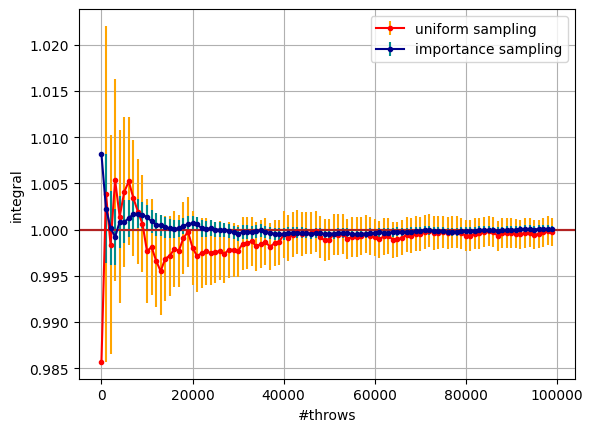

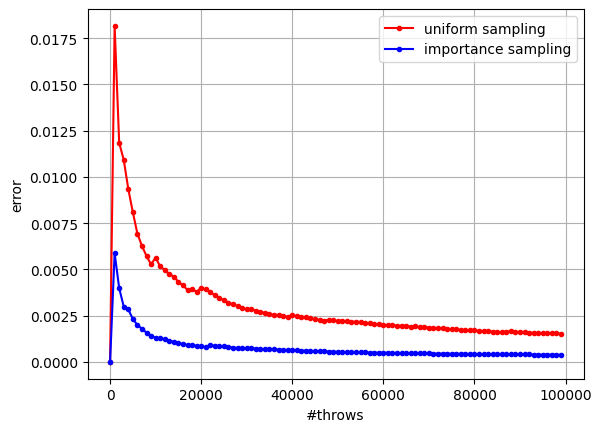

In [12]:
# mean value of integral as a function of the number of throws
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

integral1 = np.loadtxt("es2_1/integral1.dat")
x = integral1[:,0]
y = integral1[:,1]
err = integral1[:,2]

plt.figure(1)
plt.errorbar(x,y,err, ecolor= 'orange', marker = 'o', markersize = 3, color='red', label = 'uniform sampling')
plt.axhline(y=1, color='firebrick', linestyle='-')
plt.xlabel('#throws')
plt.ylabel('integral')
plt.grid(True)

integral2 = np.loadtxt("es2_1/integral2.dat")
x_is = integral2[:,0]
y_is = integral2[:,1]
err_is = integral2[:,2]

plt.figure(1)
plt.errorbar(x_is,y_is,err_is, ecolor= 'darkcyan', marker = 'o', markersize = 3, color='darkblue', label = 'importance sampling')
plt.axhline(y=1, color='firebrick', linestyle='-')
plt.xlabel('#throws')
plt.ylabel('integral')
plt.grid(True)
plt.legend()

plt.figure(2)
plt.plot(x, err, color='red', marker = 'o', markersize = 3, label='uniform sampling')
plt.xlabel('#throws')
plt.ylabel('error')
plt.grid(True)

plt.figure(2)
plt.plot(x_is, err_is, marker = 'o', markersize = 3, color='blue', label = 'importance sampling')
plt.xlabel('#throws')
plt.ylabel('error')
plt.grid(True)
plt.legend()

plt.show()

## Esercizio 02.2

#### Random Walk on a lattice
Simuliano un random walk discreto su un reticolo di passo 1. Ad ogni step il walker può fare un passo in una delle tre direzioni spaziali o in avanti o all'indietro. Per campionare i passi estraiamo casualmente un numero da 1 a 6, lo trasformiamo in un intero e ad ogni numero associamo una possibile mossa.

[1.01249872 0.97099377]


/tmp/ipykernel_5114/3823837448.py:17: RuntimeWarning: invalid value encountered in sqrt
  return a * np.sqrt(b * x)
/tmp/ipykernel_5114/3823837448.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_fit, y_fit, 'g--', label = 'Fit', color="blue")


Text(0, 0.5, '$\\sqrt{<r^2>}$ - $\\sqrt{N}$')

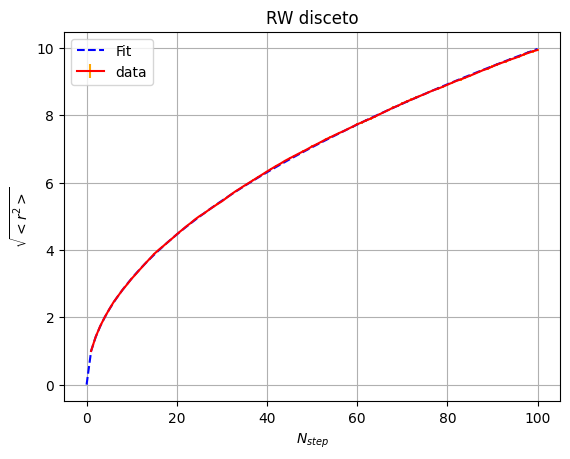

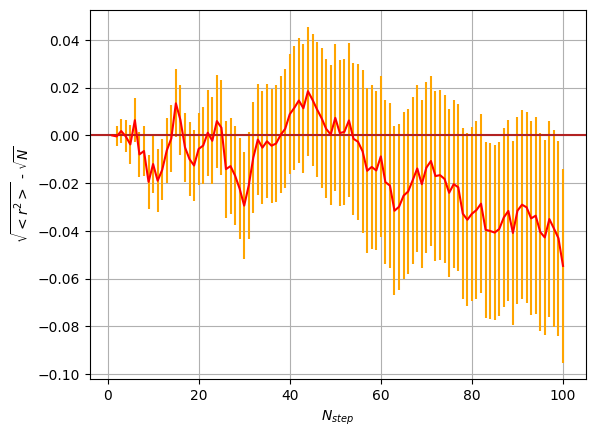

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

sqrtr2medio = np.loadtxt("es2_2/sqrt_r2_medio.dat")
x = np.arange(1, 101) # N_step
y = sqrtr2medio[:,0]
err = sqrtr2medio[:,1]

plt.figure(1)
plt.errorbar(x,y,err, ecolor= 'orange' ,color='red', label = 'data')
#plt.plot(x, err)
# Definiamo la funzione di fit (radice: y = a*sqrt(x))
def radice(x, a, b):
    return a * np.sqrt(b * x)

# Fit della curva
popt, pcov = curve_fit(radice, x, y )

# Estraiamo i parametri ottimizzati
a_fit = popt
print(popt)

# Creiamo i dati della curva fittata
x_fit = np.linspace(0, 100, 100)
y_fit = radice(x_fit, *popt)
plt.plot(x_fit, y_fit, 'g--', label = 'Fit', color="blue")

plt.title("RW disceto")
plt.legend()
plt.xlabel('$N_{step}$')
plt.ylabel('$\sqrt{<r^2>}$')
plt.grid(True)

# differenza tra valore calcolato e valore aspettato (sqrt(N))
plt.figure(2)
plt.errorbar(x,(y-np.sqrt(x)),err, ecolor= 'orange' ,color='red', label = 'data')
plt.axhline(y=0, color='firebrick', linestyle='-')
plt.grid()
plt.xlabel('$N_{step}$')
plt.ylabel('$\sqrt{<r^2>}$ - $\sqrt{N}$')



#### Continuum Random walk 

Simuliamo un random walk continuo estraendo l'angolo $\theta$ e l'angolo $\phi$ delle coordinate sferiche.
Se estraiamo casualmente $\theta$ e $\phi$ in modo uniforme otteniamo che la distribuzione dei punti sulla sfera non è uniforme perchè si estraggono più punti vicino ai poli essendo che il raggio delle sezioni della sfera vicino ai poli è più piccolo e quindi i punti estratti con angolo $\phi$ pari a 0 o $\phi$ sono più concentrati. Il motivo di questo è dovuto alla presenza dello jacobiano nel cambio di coordiante. (vedi https://mathworld.wolfram.com/SpherePointPicking.html) Controllando la normalizzazione della probabilità di estrazione dei punti otteniamo che dobbiamo imporre $$\int_0^{2\pi} \int_0^\pi \frac{1}{4\pi}\sin(\theta) d\phi d\theta = 1$$ da cui si ha $$\int_0^\pi \frac{1}{2}\sin(\theta) d\theta = 1$$ quindi usiamo il metodo dell'inversa della comulativa per campionare una probabilità di $ p(\theta) = \frac{1}{2}\sin(\theta)$. 
La comulativa è $F(\theta) = \frac{1}{2} (1- \cos(\theta)) = y$, da cui si ha che $\theta = \arccos(1-2y)$.

/tmp/ipykernel_5114/3477852031.py:17: RuntimeWarning: invalid value encountered in sqrt
  return a * np.sqrt(b * x)
/tmp/ipykernel_5114/3477852031.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_fit, y_fit, 'g--', label = 'Fit', color="blue")


[1.0107595  0.97615902]


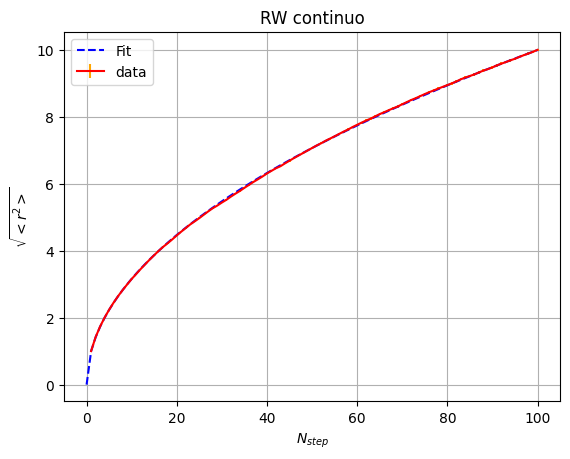

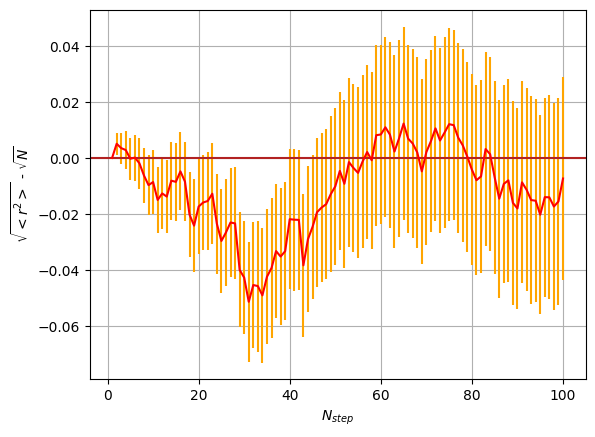

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

sqrtr2medio_c = np.loadtxt("es2_2/sqrt_r2_medio_continuum.dat")
x_c = np.arange(1, 101)
y_c = sqrtr2medio_c[:,0]
err_c = sqrtr2medio_c[:,1]

plt.figure(1)
plt.errorbar(x_c,y_c,err_c, ecolor= 'orange' ,color='red', label = 'data')

# Definiamo la funzione di fit (radice: y = a*sqrt(x))
def radice(x, a, b):
    return a * np.sqrt(b * x)

# Fit della curva
popt_c, pcov_c = curve_fit(radice, x_c, y_c )

# Estraiamo i parametri ottimizzati
a_fit = popt_c
print(popt_c)

# Creiamo i dati della curva fittata
x_fit = np.linspace(0, 100, 100)
y_fit = radice(x_fit, *popt_c)
plt.plot(x_fit, y_fit, 'g--', label = 'Fit', color="blue")
plt.grid(True)

plt.title("RW continuo")
plt.legend()
plt.xlabel('$N_{step}$')
plt.ylabel('$\sqrt{<r^2>}$')


# differenza tra valore calcolato e valore aspettato (sqrt(N))
plt.figure(2)
plt.errorbar(x_c,(y_c-np.sqrt(x_c)),  err_c, ecolor= 'orange', color='red', label = 'data')
plt.axhline(y=0, color='firebrick', linestyle='-')
plt.xlabel('$N_{step}$')
plt.ylabel('$\sqrt{<r^2>}$ - $\sqrt{N}$')

plt.grid(True)
